<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [52]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_ajuste_logistica as sal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
df = pd.read_pickle('datos/df_estandarizado.pkl')
df = df.astype(float)

In [54]:
df.head()

,customer_id,merchant_id,is_fraudulent,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax
0,0.540541,0.517857,0.0,0.497382,0.524610,0.0,0.0,1.0,0.0,0.575512,0.480769
1,0.543689,0.536842,1.0,0.529126,0.486978,0.0,0.0,0.0,1.0,0.189330,0.826923
2,0.586207,0.506024,1.0,0.600000,0.524610,0.0,0.0,1.0,0.0,0.123979,0.750000
3,0.543689,0.525773,1.0,0.600000,0.505313,0.0,1.0,0.0,0.0,0.761789,0.788462
4,0.470000,0.523810,1.0,0.497382,0.513546,0.0,0.0,1.0,0.0,0.188182,0.346154


In [55]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "is_fraudulent")

In [56]:
analisis_mod_clas.ajustar_modelo("logistic_regression")

## Cálculo de métricas

In [57]:
analisis_mod_clas.calcular_metricas("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.558376,0.558223,0.558376,0.557772,0.115841,0.588857,0.00348,NaN,NaN,NaN
test,0.552004,0.552218,0.552004,0.551582,0.104036,0.579057,NaN,NaN,0.00348,NaN


- En las métricas observamos que, el principal problema del modelo es el bajo valor de Kappa obtenido. Esta métrica mide el impacto del azar, y un valor cercano a 0, en este caso 0,13, indica que nuestras predicciones podrían estar dominadas por el azar.

- El AUC representa el área bajo la curva ROC, siendo el valor óptimo es 1. En un AUC de 0.58, hay margen de mejora.

- Accuracy, por su parte, indica la proporción de casos correctamente predichos. Un valor de 0.56 se puede mejorar. 

- Precision determina cuánto de fiables son las predicciones de los casos positivos, mientras que el recall mide qué porcentaje de los casos realmente positivos son detectados correctamente.

- Observaremos la matriz de confusión:

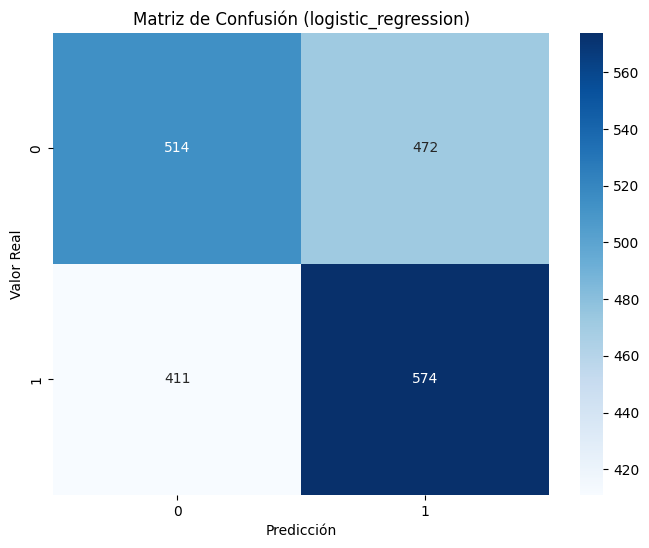

In [58]:
analisis_mod_clas.plot_matriz_confusion("logistic_regression")

- Al observar la matriz de confusión, observamos una cantidad considerable de falsos positivos (FP) y falsos negativos (FN). Nos preocupan especialmente los FN, ya que es crítico evitar clasificar una transacción fraudulenta como no fraudulenta. Por esta motivo, es preferible reducir los FN, aún cuando pueda resultar en un aumento de los FP.

- En este caso entonces, daremos prioridad un recall más alto, con una menor precisión.

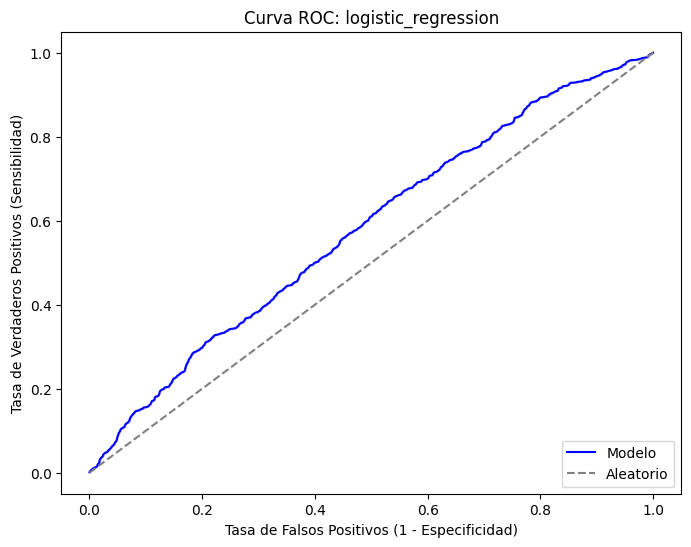

In [59]:
analisis_mod_clas.curva_roc("logistic_regression")

In [60]:
df_errores_final = analisis_mod_clas.filtrar_errores("logistic_regression", "fn")
df_errores_final

,customer_id,merchant_id,is_fraudulent,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax,real,predicho
1851,0.543689,0.388235,1.0,0.514851,0.505313,1.0,0.0,0.0,0.0,0.057200,0.557692,1.0,0.0
8224,0.466667,0.514851,1.0,0.450237,0.513546,0.0,1.0,0.0,0.0,0.076173,0.115385,1.0,0.0
3055,0.539326,0.478723,1.0,0.450000,0.529551,0.0,1.0,0.0,0.0,0.001175,0.576923,1.0,0.0
3100,0.515152,0.435897,1.0,0.550633,0.486978,0.0,1.0,0.0,0.0,0.953083,0.634615,1.0,0.0
8028,0.515464,0.540000,1.0,0.475248,0.486978,0.0,0.0,0.0,1.0,0.283711,0.903846,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,0.425000,0.582609,1.0,0.493213,0.479829,0.0,0.0,0.0,1.0,0.642460,0.019231,1.0,0.0
2867,0.494845,0.506024,1.0,0.492823,0.524610,0.0,0.0,1.0,0.0,0.427142,0.884615,1.0,0.0
5697,0.425000,0.505051,1.0,0.545455,0.524610,0.0,0.0,0.0,1.0,0.781974,0.461538,1.0,0.0
6914,0.528736,0.457831,1.0,0.505376,0.479829,0.0,0.0,0.0,1.0,0.202790,0.750000,1.0,0.0


In [61]:
df.columns

Index(['customer_id', 'merchant_id', 'is_fraudulent', 'location',
       'purchase_category', 'card_type_American Express', 'card_type_Discover',
       'card_type_MasterCard', 'card_type_Visa', 'amount_minmax',
       'customer_age_minmax'],
      dtype='object')

In [115]:
df.rename(columns={"amount_minmax": "amount", "customer_age_minmax": "customer_age"}, inplace=True)

scaler_path = "datos/escalador.pkl"
scaler_columns = ['amount_minmax', 'customer_age_minmax']
original_columns = ['amount', 'customer_age']

encoders_info = {
    "datos/oh_encoder.pkl": [
        'card_type_American Express', 'card_type_Discover', 'card_type_MasterCard', 'card_type_Visa'],

    "datos/target_encoder.pkl": [
        'customer_id', 
        'merchant_id', 
        'location', 
        'purchase_category'
    ]
}

df_original = sal.revertir_datos_transformados(df, scaler_path, scaler_columns, original_columns, encoders_info)

KeyError: "None of [Index(['amount_minmax', 'customer_age_minmax'], dtype='object')] are in the [columns]"

In [98]:
with open("datos/escalador.pkl", 'rb') as f:
    scaler = pickle.load(f)

In [99]:
scaler

MinMaxScaler()

In [79]:
scaler_columns

['amount_minmax', 'customer_age_minmax']

In [108]:
scaler.feature_names_in_

array(['amount', 'customer_age'], dtype=object)

In [ ]:
df.rename(columns={"amount_minmax":"amount", "customer_age_minmax":"customer_age"}, inplace=True)

In [ ]:
df_revertido[["amount", "customer_age"]].values.flatten()

1

In [87]:
df_revertido[["amount", "customer_age"]].values.ndim

2

In [ ]:
df_revertido = df.copy()
df_revertido[["amount_minmax", "customer_age_minmax"]] = scaler.inverse_transform(df_revertido[["amount", "customer_age"]].values)

In [ ]:
df_revertido

,customer_id,merchant_id,is_fraudulent,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount,customer_age,amount_minmax,customer_age_minmax
0,0.540541,0.517857,0.0,0.497382,0.524610,0.0,0.0,1.0,0.0,0.575512,0.480769,5758.59,43.0
1,0.543689,0.536842,1.0,0.529126,0.486978,0.0,0.0,0.0,1.0,0.189330,0.826923,1901.56,61.0
2,0.586207,0.506024,1.0,0.600000,0.524610,0.0,0.0,1.0,0.0,0.123979,0.750000,1248.86,57.0
3,0.543689,0.525773,1.0,0.600000,0.505313,0.0,1.0,0.0,0.0,0.761789,0.788462,7619.05,59.0
4,0.470000,0.523810,1.0,0.497382,0.513546,0.0,0.0,1.0,0.0,0.188182,0.346154,1890.10,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,0.534091,0.548077,1.0,0.497608,0.479829,0.0,0.0,1.0,0.0,0.893575,0.346154,8935.28,36.0
9847,0.504950,0.523364,0.0,0.481651,0.513546,0.0,0.0,1.0,0.0,0.001956,0.461538,30.15,42.0
9848,0.514019,0.451923,0.0,0.574468,0.486978,1.0,0.0,0.0,0.0,0.633088,0.346154,6333.64,36.0
9849,0.484848,0.435897,1.0,0.537688,0.513546,0.0,0.0,0.0,1.0,0.283003,0.750000,2837.13,57.0
